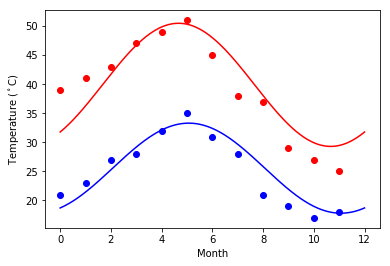

In [1]:
# Scipy: 
# Function to describe the maximum and minimum temperatures in a city in India for each months and show it graphically.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize

# Arrays for max, min and the months. 
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)

# Function to describe the maximum and minimum temperatures.
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

# call the function for curve fit.
res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min, [-40, 20, 0])
days = np.linspace(0, 12, num=365)

# plot the figure.
plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [2]:
# Matplotlib:
# Use the data from the below URL/
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


male      843
female    466
Name: sex, dtype: int64


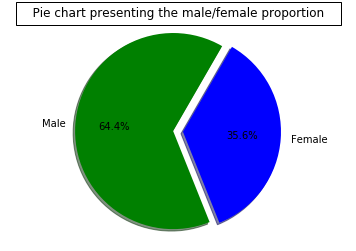

In [3]:
# Charts to plot: 
# 1. Create a pie chart presenting the male/female proportion 
import matplotlib.pyplot as plt
%matplotlib inline

gender_data = titanic['sex'].value_counts()
print(gender_data)
fig, ax = plt.subplots()
ax.set_title('   Pie chart presenting the male/female proportion   ', bbox={'facecolor':'white', 'pad':5})
labels = 'Male', 'Female'
colors = ['green', 'blue']
explode = (0, 0.1)
plt.pie(gender_data, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=60)
plt.axis('equal')
plt.show()

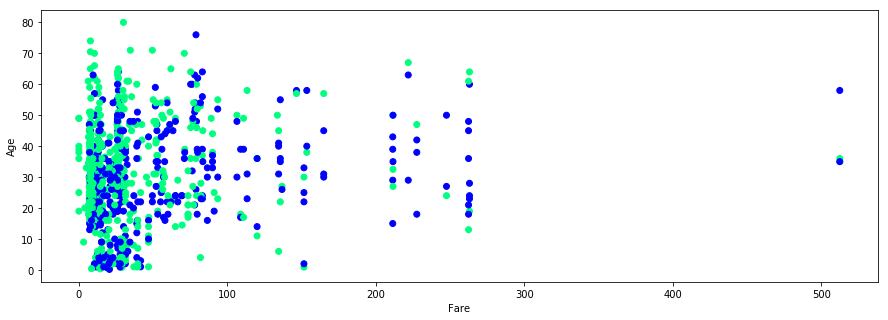

In [4]:
# 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 

plt.figure(figsize=(15,5))
color=titanic.replace({'sex':{'female':1,'male':2}})
color1=color['sex'].fillna(0)
plt.scatter(titanic['fare'],titanic['age'],cmap=('winter'),c=color1)
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()